# Figure for E-Textiles Abstract

Script to generate Figure 1 from the initial 1-page abstract submitted to E-Textiles 2023 conference. This figure shows the signal-strain and gauge factor-strain curves from the experimental testing, and 3D geometry and cross sections from the computational model.

©2023 ETH Zurich, Brett Hannigan; D-HEST; Biomedical and Mobile Health Technology (BMHT) Lab; Carlo Menon

In [3]:
library(cowplot)
library(magick)
library(readxl)
library(ggplot2)
library(broom)
library(tidyverse)
library(rsvg)
library(pdftools)
library(patchwork)

## Import Graphics from Model and Photographs

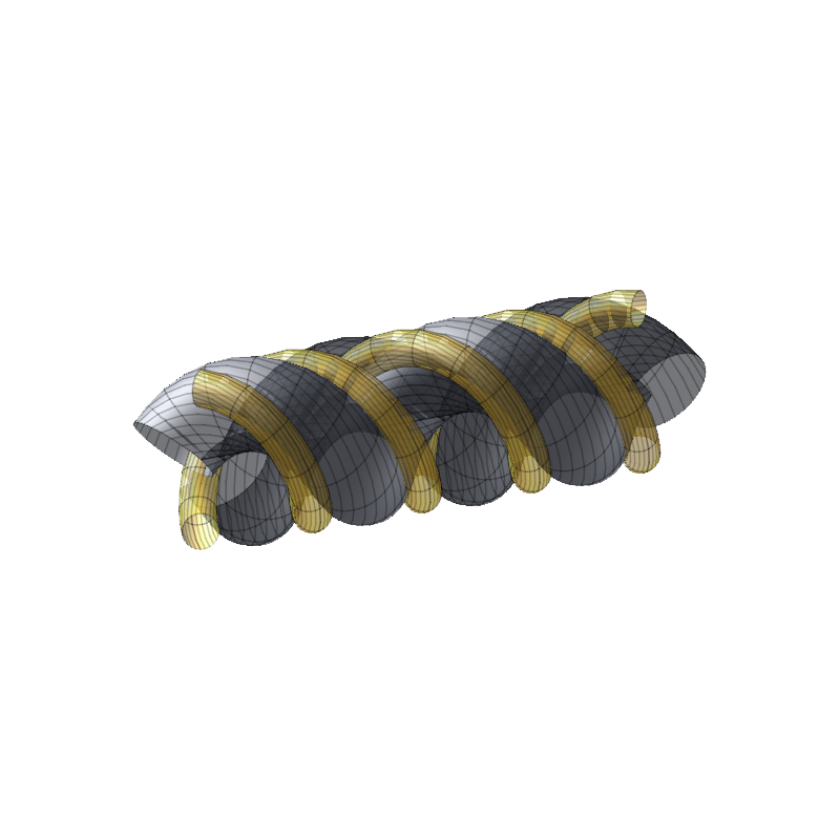

In [6]:
render_unstrained <- "./Model/Model-00Strain.png"
render_unstrained <- ggdraw() + draw_image(render_unstrained, scale=1)
render_unstrained

In [7]:
render_strained <- "Model/Model-40Strain.png"
render_strained <- ggdraw() + draw_image(render_strained, scale=1)
render_strained

In [8]:
cs_unstrained <- "Model/CrossSection-00Strain.png"
cs_unstrained <- ggdraw() + draw_image(cs_unstrained, scale=1)
cs_unstrained

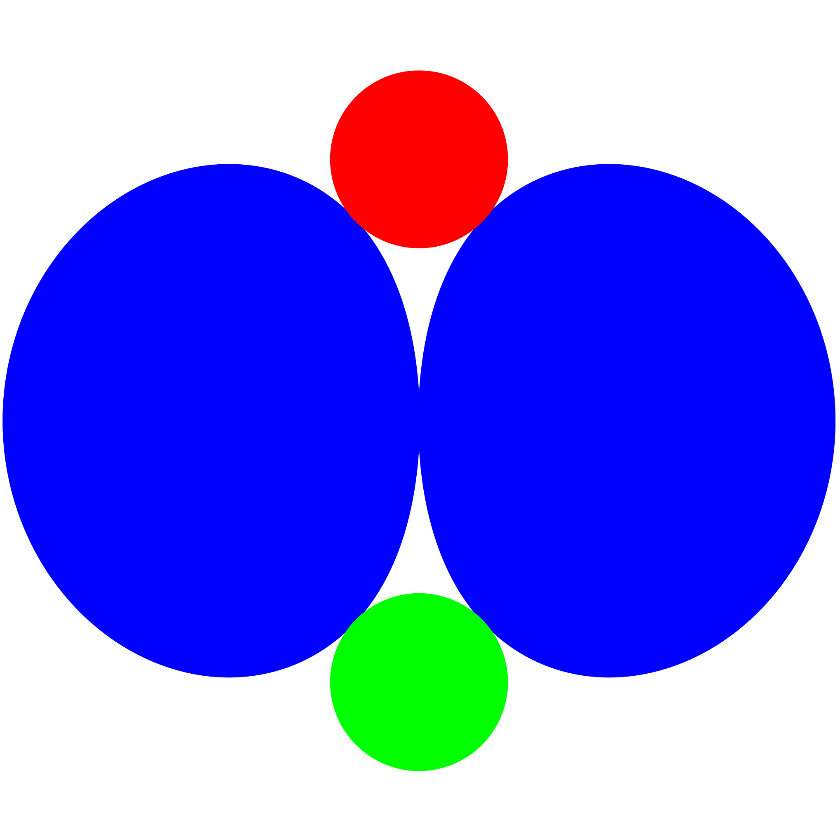

In [9]:
cs_strained <- "Model/CrossSection-40Strain.png"
cs_strained <- ggdraw() + draw_image(cs_strained, scale=1)
cs_strained

In [11]:
photo_unstrained <- "Photos/Photo-Unstrained.jpg"
photo_unstrained <- ggdraw() + draw_image(photo_unstrained, scale=1)
photo_unstrained

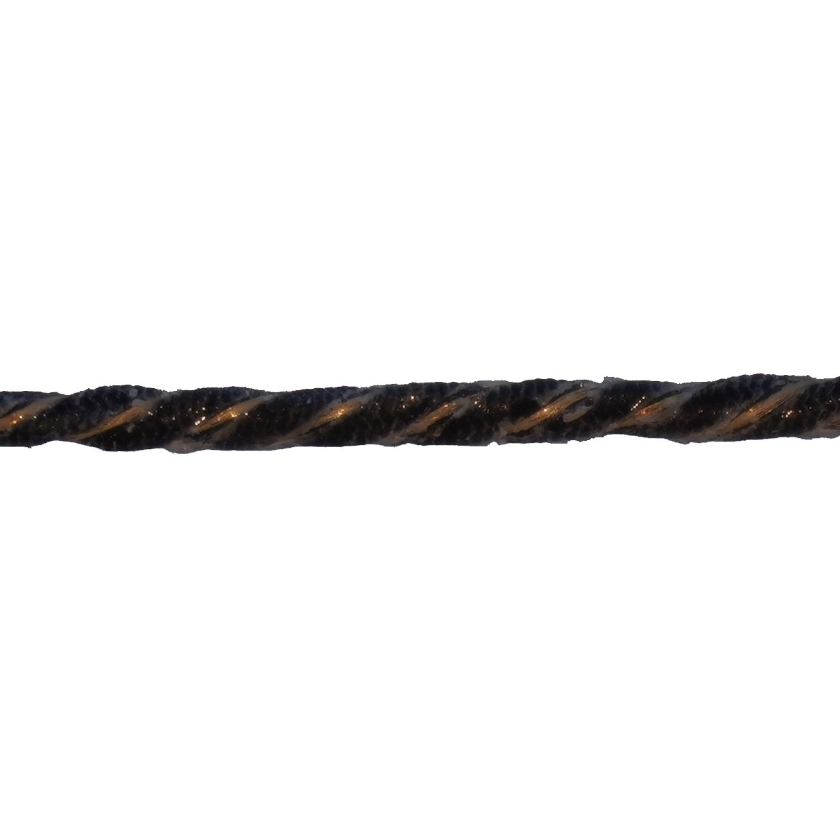

In [10]:
photo_strained <- "Photos/Photo-Strained.jpg"
photo_strained <- ggdraw() + draw_image(photo_strained, scale=1)
photo_strained

## Import Data
Data collected on 2023-02-27.

In [3]:
data_sample1 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="A2:K9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample1$sample <- 1
data_sample2 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="L2:V9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample2$sample <- 2
data_sample3 <- read_excel("./Synchronized/Summary.xlsx", sheet="Staircase Strain", range="W2:AG9542", col_names=c("time", "position", "force", "displacement", "strain", "Zmag", "Zphase", "Cs", "Rs", "dCC0", "GF"))
data_sample3$sample <- 3
data <- rbind(data_sample1, data_sample2, data_sample3)
head(data)

time position  force      displacement strain       Zmag     Zphase   
1 0.00 -26.86049 -0.2762349 -26.86050    0.000000e+00 39653400 -89.61500
2 0.01 -26.86048 -0.3542472 -26.86049    5.515678e-08 39637630 -89.65174
3 0.02 -26.86047 -0.2733152 -26.86048    1.589671e-07 39621860 -89.68848
4 0.03 -26.86047 -0.4697358 -26.86048    1.782359e-07 39606090 -89.72522
5 0.04 -26.86046 -0.2495619 -26.86048    2.081024e-07 39609510 -89.70050
6 0.05 -26.86047 -0.2770033 -26.86048    1.577628e-07 39614500 -89.67076
  Cs           Rs       dCC0          GF        sample
1 4.013700e-12 266359.0 -3.463838e-04        NA 1     
2 4.015293e-12 240954.3  5.036935e-05  913.2033 1     
3 4.016886e-12 215549.6  4.471225e-04 2812.6734 1     
4 4.018479e-12 190144.9  8.438757e-04 4734.6000 1     
5 4.018157e-12 207241.2  7.636783e-04 3669.7235 1     
6 4.017677e-12 227821.8  6.441293e-04 4082.8971 1

In [46]:
model_data <- read_excel("./Model Data.xlsx", range="A2:D102", col_names=c("strain", "Cs", "dCC0", "GF"))
model_data$sample = 4
head(model_data)

strain Cs           dCC0        GF       sample
1 0.000  3.218951e-12 0.000000000       NA 4     
2 0.004  3.238113e-12 0.005952858 1.488215 4     
3 0.008  3.257405e-12 0.011945972 1.493246 4     
4 0.012  3.276828e-12 0.017980101 1.498342 4     
5 0.016  3.296386e-12 0.024056027 1.503502 4     
6 0.020  3.316081e-12 0.030174548 1.508727 4

## Generate Plots

Warning message:
"Removed 1023 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_path()`)."


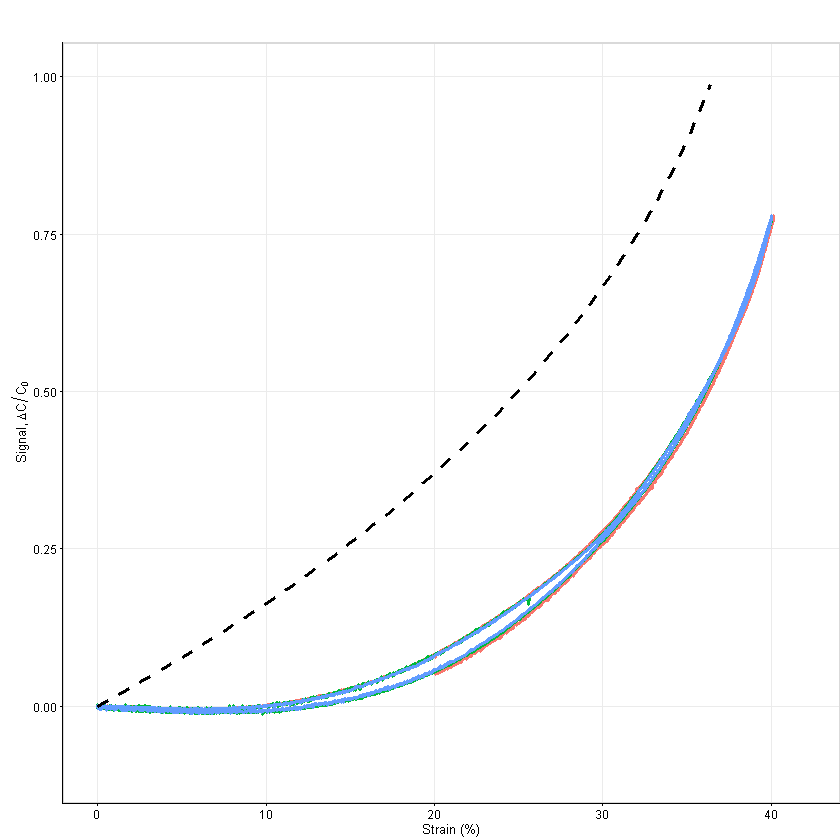

In [56]:
plt1 <- ggplot(data=data, aes(x=strain, y=dCC0, group=as.factor(sample), color=as.factor(sample)))
plt1 <- plt1 + geom_path(linewidth=1)
plt1 <- plt1 + geom_path(data=model_data, mapping=aes(x=strain+0.1, y=dCC0), size=1, colour="black", linetype="dashed")
#plt <- plt + stat_smooth(method="gam", formula=y ~ s(x,t), span=10)
plt1 <- plt1 + scale_x_continuous(limits=c(0, 0.42), labels=function(x)x*100)
plt1 <- plt1 + scale_y_continuous(limits=c(-0.1, 1))
plt1 <- plt1 + scale_color_discrete(guide="none")
plt1 <- plt1 + theme_cowplot(6) + theme(plot.margin = unit(c(0.89,0,0,0.25), "cm"))
plt1 <- plt1 + ylab(expression('Signal,'~Delta*C/C[0]))
plt1 <- plt1 + xlab(expression('Strain (%)'))
plt1 <- plt1 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt1 <- plt1 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25))
plt1 <- plt1 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))

print(plt1)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4905 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 39 rows containing missing values (`geom_path()`)."


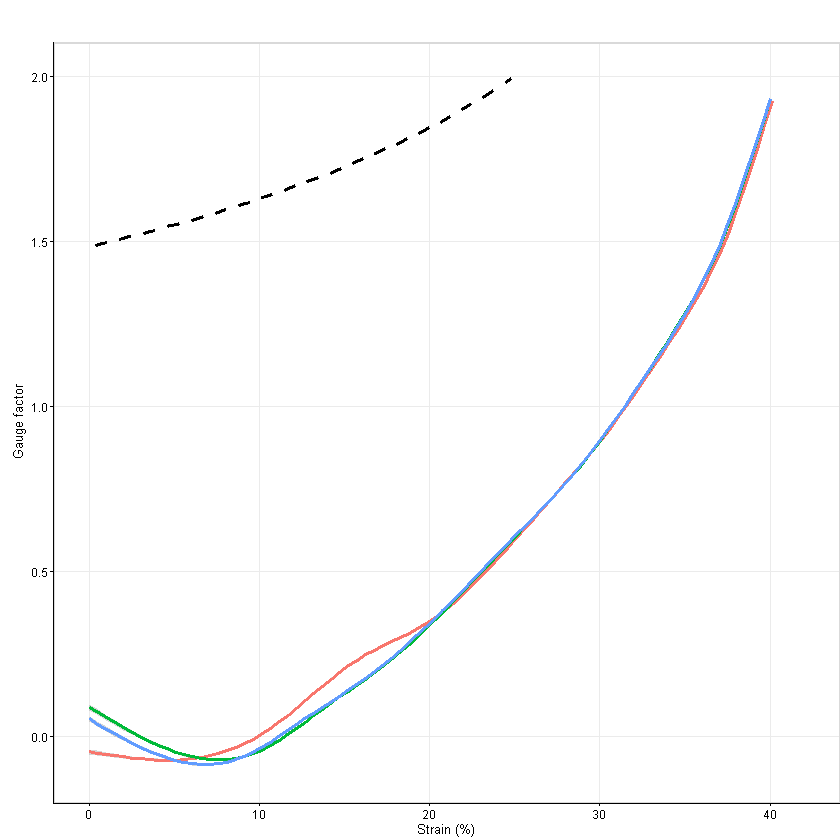

In [70]:
plt2 <- ggplot(data=data, aes(x=strain, y=GF, group=as.factor(sample), color=as.factor(sample)))
plt2 <- plt2 + stat_smooth(span=100)
plt2 <- plt2 + geom_path(data=model_data, mapping=aes(x=strain, y=GF), size=1, colour="black", linetype="dashed")
plt2 <- plt2 + scale_x_continuous(limits=c(0, 0.42), labels=function(x)x*100)
plt2 <- plt2 + scale_y_continuous(limits=c(-0.1, 2))
plt2 <- plt2 + scale_color_discrete(guide="none")
plt2 <- plt2 + theme_cowplot(6) + theme(plot.margin = unit(c(0.89,0,0,0.25), "cm"))
plt2 <- plt2 + ylab(expression('Gauge factor'))
plt2 <- plt2 + xlab(expression('Strain (%)'))
plt2 <- plt2 + panel_border() + background_grid(major="xy", minor=NA, size.major=0.25)
plt2 <- plt2 + theme(panel.grid.major = element_line(colour="#EBEBEB", linewidth=0.25))
plt2 <- plt2 + theme(plot.background = element_rect(fill='white', colour='white'), text=element_text(size=8), axis.text.x = element_text(size = 7), axis.text.y = element_text(size = 7))
                                  
print(plt2)

## Compile Figure

Warning message:
"Removed 1023 rows containing missing values (`geom_path()`)."
Warning message:
"Removed 9 rows containing missing values (`geom_path()`)."
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 4905 rows containing non-finite values (`stat_smooth()`)."
Warning message:
"Removed 39 rows containing missing values (`geom_path()`)."


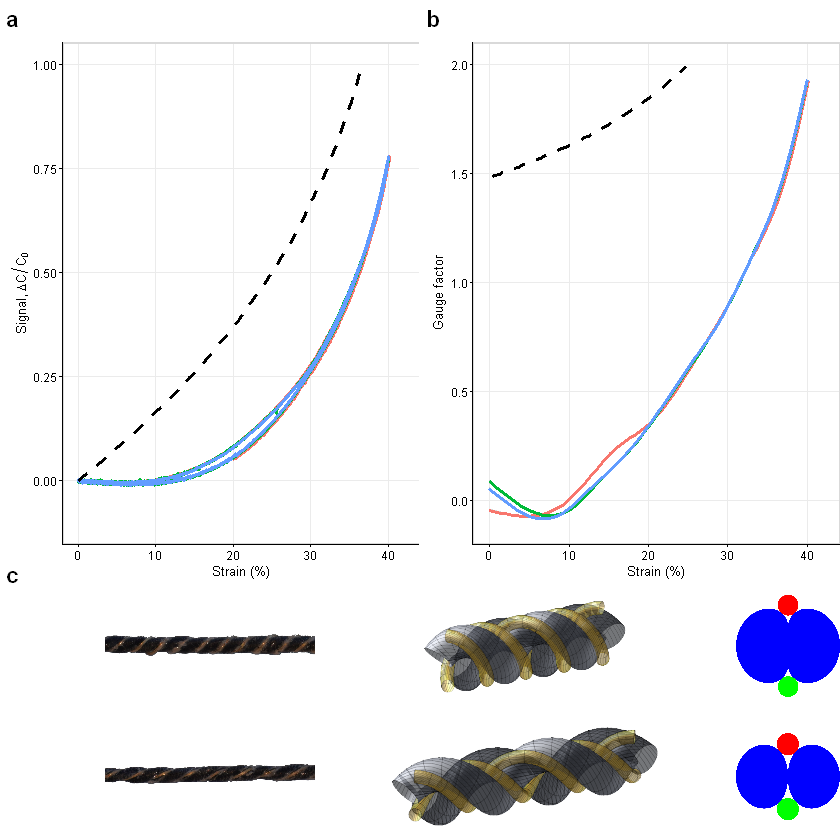

In [124]:
left_col <- plot_grid(plt1, plt2, nrow=1, rel_widths=c(1, 1), labels=c("a", "b"), align="t")
#print(left_col)
right_col <- plot_grid(NULL, photo_unstrained, render_unstrained, cs_unstrained, NULL, photo_strained, render_strained, cs_strained, nrow=2, rel_widths=c(1, 2, 4, 1), rel_heights=c(1, 1), labels=c(), align="t")
#print(right_col)
plot_grid(left_col, right_col, ncol=1, rel_heights=c(2.25, 1), labels=c("", "c"), vjust=0.08)

ggsave('Fig1-Abstract.png', width=140, height=90, units="mm", scale=1, bg="white", dpi=600)